In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.1.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train_raw, y_train), (x_test_raw, y_test) = mnist.load_data()

print(x_train_raw.shape)
print(x_test_raw.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
import helper as hp
#hp.display_example(x_train_raw, y_train)

In [5]:
x_train = hp.normalize_images(x_train_raw)
x_test = hp.normalize_images(x_test_raw)

In [6]:
x_train = x_train.reshape(60000,28,28,-1)
x_test = x_test.reshape(10000,28,28,-1)
print(x_test.shape)

(10000, 28, 28, 1)


In [7]:
from tensorflow import keras

model = keras.models.Sequential([
  keras.layers.Conv2D(32, input_shape = (28,28,1), kernel_size = (3, 3), strides = (1, 1), activation = 'relu'),
  keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'),
  keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(input_shape = (12,12,64)),
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation = 'softmax'),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
print(model.summary())

Loaded model from disk
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (Non

In [9]:
model.compile(optimizer=keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#model.fit(x_train, y_train, validation_data = (x_test,y_test),  epochs = 10)
(test_loss, test_accuracy) = model.evaluate(x_test,y_test,verbose=0)
print(f"Loss : {test_loss}")
print(f"Testing accuracy : {test_accuracy}")

Loss : 0.040081295905760456
Testing accuracy : 0.989300012588501


In [11]:
"""# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")"""

'# serialize model to JSON\nmodel_json = model.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nmodel.save_weights("model.h5")\nprint("Saved model to disk")'

Prediction : 2


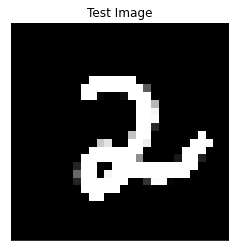

In [12]:
hp.test_image(model)

In [13]:
model.predict(x_test[0].reshape(1,28,28,1))

array([[2.5158019e-16, 9.9732906e-13, 1.0482261e-09, 1.3562673e-09,
        4.3280864e-16, 2.5641134e-14, 3.2440049e-20, 1.0000000e+00,
        8.6436926e-15, 1.8997103e-10]], dtype=float32)

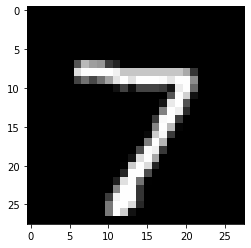

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_test_raw[0], cmap='gray')
plt.show()